___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Theo

#### Abel

#### Gustavo Pierre

#### Victor Jurdi

___

# Wines Review

___

## A. INTRODUÇÃO

Para o Projeto 3 de Ciências dos Dados, o grupo escolheu trabalhar com vinhos. O nosso DataSet contém 10 variavéis(Pais de origem,descrição do vinho,designação, pontos na avaliação, preço, provincia, região, variedade e a adega produtora. Com isso nosso grupo procura prever o preço do vinho através das variavéis mais qualificadas, que serão, o país, os pontos (nota do vinho) e o tipo da uva.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [43]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#from operator import itemgetter

In [12]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Theo B.R.Theo_Barbara\Documents\GitHub\projeto_Cdata\Projeto 3 - Previsão de preço de Vinhos


### BASE DE DADOS

In [13]:
x=pd.read_csv('winemag-data_first150k.csv')
x.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [14]:
del x["Unnamed: 0"]

In [15]:
x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [16]:
x.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [17]:
#x.variety.value_counts()

In [18]:
x["Frequencia"] = 0
x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,0


In [19]:
dic = {}
for e in x.variety:
    if e not in dic:
        dic[e] = 1
    
        
    elif e in dic:
        dic[e] +=1


In [20]:
lista = []
for e in dic:
    if dic[e] > 0:
        lista.append(dic[e]/len(dic))

In [21]:
dic2 = {}
i=0
for e in x.variety:
    if e not in dic2:
        dic2[e] = 1

In [22]:
i=0
for e in dic2:
    dic2[e] = lista[i]
    i+=1


In [23]:
lista2=[]
for uva in x.variety:
    lista2.append(dic2[uva])
        

In [24]:
x.Frequencia = lista2

In [25]:
x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0.349684
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,0.039557


In [26]:
novo_x=x[x.Frequencia>0.5]
novo_x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,22.612342
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,22.612342


In [27]:
novo_x.loc[(x.price<50),'Preço'] = 'Até 50'
novo_x.loc[(x.price>50)&(x.price<=200),'Preço'] = 'Até 200'
#x.loc[(x.price>100)&(x.price<=200),'Preço'] = 'Até 200'
novo_x.loc[(x.price>200)&(x.price<=400),'Preço'] = 'Até 400'
#x.loc[(x.price>300)&(x.price<=400),'Preço'] = 'Até 400'
novo_x.loc[(x.price>400)&(x.price<=600),'Preço'] = 'Até 600'
#x.loc[(x.price>500)&(x.price<=600),'Preço'] = 'Até 600'
novo_x.loc[(x.price>600)&(x.price<=800),'Preço'] = 'Até 800'
#x.loc[(x.price>700)&(x.price<=800),'Preço'] = 'Até 800'
novo_x.loc[(x.price>800)&(x.price<=1000),'Preço'] = 'Até 1000'
#x.loc[(x.price>900)&(x.price<=1000),'Preço'] = 'Até 1000'
novo_x.loc[(x.price>1000)&(x.price<=1500),'Preço'] = 'Até 1500'
#x.loc[(x.price>1500)&(x.price<=2000),'Preço'] = 'Até 2000'
novo_x.loc[(x.price>2000),'Preço'] = 'Mais que 2000'

C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
novo_x.loc[(x.points<=80),'Pontos'] = '80 pontos'
novo_x.loc[(x.points>80)&(x.points<=85),'Pontos'] = '81 - 85 pontos'
novo_x.loc[(x.points>85)&(x.points<=90),'Pontos'] = '86 - 90 pontos'
novo_x.loc[(x.points>90)&(x.points<=95),'Pontos'] = '91 - 95 pontos'
novo_x.loc[(x.points>95)&(x.points<=100),'Pontos'] = '95 - 100 pontos'

C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### ANÁLISE DESCRITIVA

C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


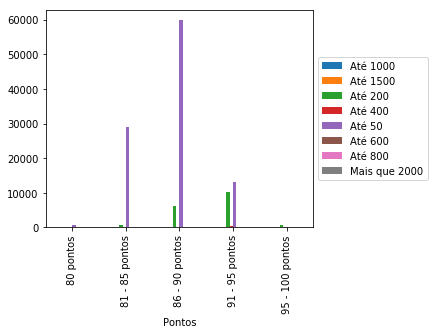

In [33]:
ct = pd.crosstab(novo_x.Pontos, novo_x.Preço)
ct.plot(kind='bar');
ax = plt.subplot(111);
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [34]:
novo_x.points.corr(x.price)

0.4600421512441059

In [35]:
novo_x.Frequencia.corr(x.price)

0.11149984361374775

In [36]:
novo_x.Frequencia.corr(x.points)

0.06969229048694064

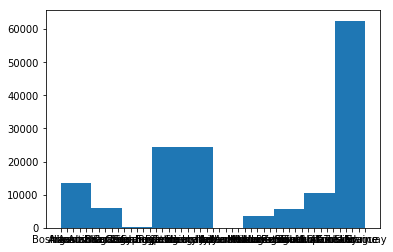

In [37]:
plt.hist(x["country"]);

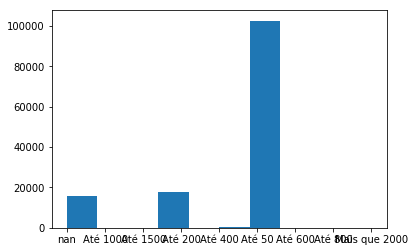

In [38]:
plt.hist(novo_x["Preço"]);

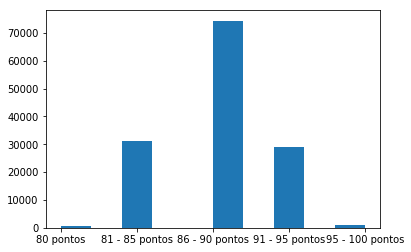

In [39]:
plt.hist(novo_x.Pontos);

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [56]:
seed = 569

novo_x2 = novo_x[['points', 'country', 'variety']]

X_train, X_test, y_train, y_test = train_test_split(novo_x2, novo_x.price, random_state = seed)

X_train

media_price = np.mean(y_train)
print('A média dos preços dos vinhos é de R$ {0}'.format(media_price))



A média dos preços dos vinhos é de R$ 33.675862587386305


o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [57]:
X = X_train[['points']]#, 'country', 'variety']]
y = X_train[['price']]

KeyError: "['price'] not in index"

In [58]:
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

ValueError: could not convert string to float: 'Chardonnay'

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [41]:
df = novo_x[['price', 'points', 'country', 'variety']]

In [42]:
df.describe()

,price,points
count,124172.000000,136726.000000
mean,33.732838,87.931074
std,37.007626,3.247524
min,4.000000,80.000000
25%,16.000000,86.000000
50%,25.000000,88.000000
75%,40.000000,90.000000
max,2300.000000,100.000000


o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS